## Predicting Sale price of a Bull-Dozer using M.L
## 1. Problem Defination:
Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.
## 2. Data
Data is downloaded from kaggle site: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview



In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import RandomizedSearchCV

In [128]:
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False,
              parse_dates=["saledate"])

In [129]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [132]:
df.shape

(412698, 53)

## Exploring the Dataset with Matplotlib Diagrams

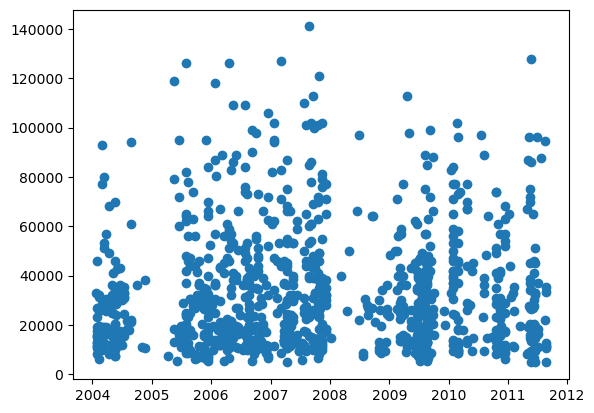

In [133]:
# fig, ax=plt.subplots()
# ax.scatter(df["saledate"][:1000], df["salePrice"][:1000])
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])  # Corrected column name
plt.show()  # Don't forget to display the plot

<Axes: ylabel='Frequency'>

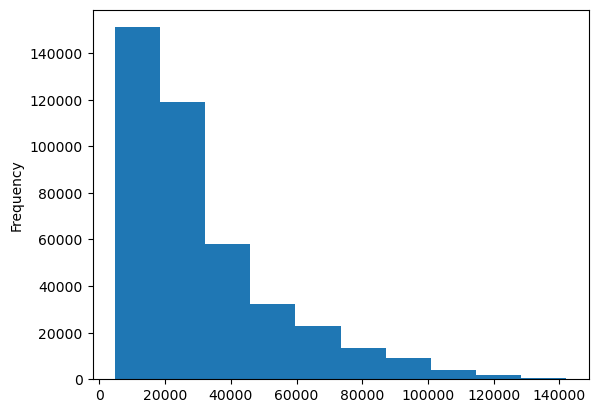

In [134]:
df.SalePrice.plot.hist()

In [135]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

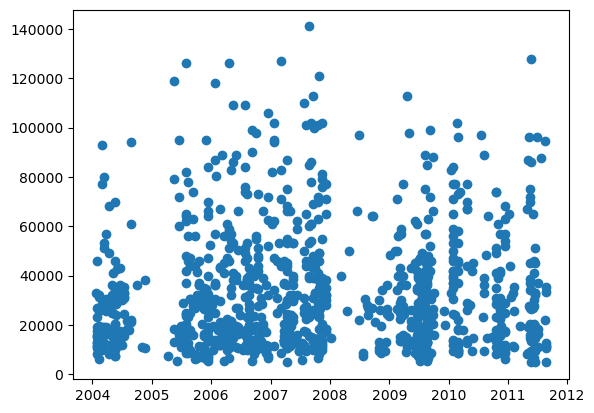

In [136]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

## Sorting Dataframe by Saledate

In [137]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Feature Engineering By Adding Date Parameters

In [138]:
df["saleYear"]=df.saledate.dt.year
df["saleMonth"]=df.saledate.dt.month
df["saleDay"]=df.saledate.dt.day
df["saleDayOfWeek"]=df.saledate.dt.dayofweek
df["saleDayOfYear"]=df.saledate.dt.dayofyear

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [140]:
df.shape

(412698, 58)

In [141]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [142]:
df.drop("saledate",inplace=True,axis=1)

In [143]:
df.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## Converting Strings to Categories

In [144]:
# Converting all String Values to Category
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

## Filling Missing Values

In [146]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [147]:
## Checking which column has Null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [148]:
# Filling Null columns with median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label+"is_missing"]=pd.isnull(content)
            df[label]=content.fillna(content.median())

## Filling Categorical Values to numbers

In [149]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label + "_is_missing"] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes + 1


In [150]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [151]:
df.isnull().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

## Modelling

In [152]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
X=df.drop("SalePrice",axis=1)
y=df["SalePrice"]
model.fit(X,y)
model.score(X,y)

0.9875468079970562

In [153]:

df.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int32

## Developing A Validation Set

In [154]:
df_val=df[df.saleYear==2012]
df_train=df[df.saleYear !=2012]
len(df_train),len(df_val)

(401125, 11573)

In [155]:
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

## Building an Evaluation Function

In [156]:
# from sklearn.metrics import mean_absolute_error,mean_squared_log_error
# def rmsle(y_test,y_preds):
#     '''
#     Calculates root mean squared log error between  predictions and  true labels
#     '''
#     return np.sqrt(mean_squred_log_error(y_test,y_preds))

# #Creating a model that evaluates model on few diffrent levels
# def show_scores(model):
#     train_preds=model.predict(X_train)
#     val_preds=model.predict(X_valid)
#     scores={"Training MAE":mean_absolute_error(y_train,train_preds),
#             "Valid MAE":mean_absolute_error(y_valid,val_preds),
#             "Training RSmLE":rmsle(y_train,y_preds),
#              "Valid RSMLE":rsmle(y_valid,val_preds),
#             "Training R^2":r2_score(y_train,train_preds),
#             "Valid R^2":r2_score(y_valid,val_preds)}
#     return scores



import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculates root mean squared log error between predictions and true labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Example of creating a model and evaluating on different levels
def show_scores(model, X_train, y_train, X_valid, y_valid):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_valid, val_preds)
    }
    
    return scores

# Example usage (assuming you have already trained a model 'model' and defined X_train, y_train, X_valid, y_valid)
scores = show_scores(model, X_train, y_train, X_valid, y_valid)
print(scores)


{'Training MAE': 1576.4843819607352, 'Valid MAE': 1869.2186318154324, 'Training RMSLE': 0.0841144059088283, 'Valid RMSLE': 0.08746318355899653, 'Training R^2': 0.987563251253579, 'Valid R^2': 0.9868076830397394}


## Fine Tunning Hyperparameters 

In [157]:
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            max_samples=10000)

In [158]:
%%time
model.fit(X_train,y_train)

CPU times: total: 1min 25s
Wall time: 29.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [159]:
show_scores(model, X_train, y_train, X_valid, y_valid)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## FineTunning HyperParameters with RandomizedCv

In [160]:
# %%time
# rf_grid={"n_estimators": np.arange(10,100,10),
#          "max_depth": [None,3,5,10],
#          "min_samples_split": np.arange(2,20,2),
#          "min_samples_leaf": np.arange(1,20,2),
#          "max_features": [0.5,1, "sqrt","auto"],
#          "max_samples" :[10000]}
# rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
#                                random_state=42),
#                                param_distributions=rf_grid,
#                                n_iter=5,
#                                cv=5,
#                                verbose=True)
# rs_model.fit(X_train,y_train)





%%time

rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),  # Corrected parameter name
    "min_samples_leaf": np.arange(1, 20, 2),   # Corrected parameter name
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

rs_model = RandomizedSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid,
    n_iter=5,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Verbosity level: 0 (silent) to 3 (very verbose)
    random_state=42  # Set for reproducibility
)

rs_model.fit(X_train, y_train)


UsageError: Line magic function `%%time` not found.


In [ ]:
rs_model.best_params_

## Evaluating the RS Model

## Training the Model with the best Hyperparameters

In [ ]:
ideal_model=RandomForestRegressor(n_jobs=-1,
                                  # n_estimators=80,
                                  # max_features=1,
                                  # max_samples=100000,
                                  # min_samples_leaf=6,
                                  # max_depth=5,
                                  # random_state=42)



                                   n_estimators=40,
                                  max_features=0.5,
                                  max_samples=10000,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_depth=5,
                                 random_state=42)
ideal_model.fit(X_train,y_train)

In [ ]:
show_scores(ideal_model, X_train, y_train, X_valid, y_valid)

In [ ]:
show_scores(rs_model, X_train, y_train, X_valid, y_valid)

## Making a Test Prediction

In [ ]:
df_test=pd.read_csv("data/Test.csv",
                   low_memory=False,
                   parse_dates=["saledate"])
df_test.head()
                                

In [ ]:
def preprocess_data(df):
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfWeek"]=df.saledate.dt.dayofweek
    df["saleDayOfYear"]=df.saledate.dt.dayofyear

    df.drop("saledate",axis=1,inplace=True)

    # Converting all String Values to Category
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label]=content.astype("category").cat.as_ordered()


            # Filling Null columns with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"is_missing"]=pd.isnull(content)
                df[label]=content.fillna(content.median())


    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1

    return df

            
#df_prediction=ideal_model.predict(df_test)

In [ ]:
df_test=preprocess_data(df_test)
df_test.head()

In [165]:
#finding how columns differ
set(X_train.columns)-set(df_test.columns)

set()

In [161]:
df_test['auctioneerIDis_missing']=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


## MAking Test.csv Prediction

In [167]:
test_preds=ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


## Formating the Predictions into kaggle competitons recommended way

In [171]:
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=y_train
df_preds

,SalesID,SalesPrice
0,1227829,66000.0
1,1227844,57000.0
2,1227847,10000.0
3,1227848,38500.0
4,1227863,11000.0
...,...,...
12452,6643171,40000.0
12453,6643173,69000.0
12454,6643184,12500.0
12455,6643186,90000.0


## Feature Importance

In [174]:
len(ideal_model.feature_importances_)

102

In [175]:
X_train.shape

(401125, 102)

In [189]:
# def plot_features(columns,importances,n=20):
#     df=(pd.DataFrame({"features": columns,
#         "feature_importances":importances}
#                     ).sort_values("feature_importances",ascending=False).reset_index(drop=True))

#     fig,ax=plt.subplots()
#     ax.barh(df["features"][:n],df["feature_importances"][:20])
#     ax.set_ylabel("Features")
#     ax.set_xlabel("Feature importance")






KeyError: 'feature_Importances'

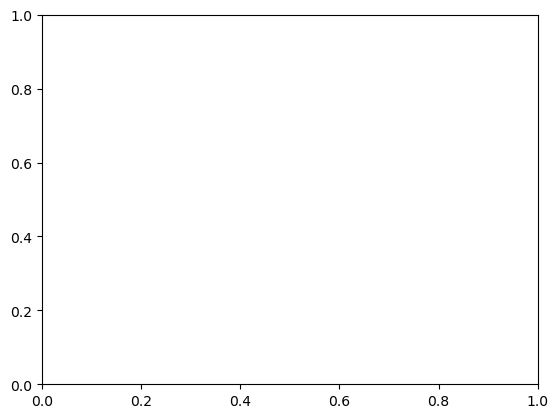

In [184]:
    plot_features(X_train.columns,ideal_model.feature_importances_)